In [ ]:
%load_ext autoreload
%autoreload 2

import banner

topics = ['Ray for Parallel, Distributed Processing',
          'Using Ray for Running Functions in Parallel',
          'Now let\'s try training neural networks in parallel']

banner.reset(topics)

In [ ]:
banner.next_topic()

# Ray for Parallel, Distributed Processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

Calculate the squares of integers from 0 to $n$.

In [ ]:
delay = 0.1

def g(x):
    time.sleep(delay)
    return x * x

g(4)

In [6]:
[g(x) for x in [0, 4, 8]]

[0, 16, 64]

Now calculate for all sets 0 to $n$ for $n \in [0,20]$.

In [7]:
delay = 0.1

def g(x):
    time.sleep(delay)
    return x * x

results = []  # collect n and execution times 

for n in range(21):  # range(0, 60, 4):
    
    start = time.time()
    result = [g(i) for i in range(n)]
    elapsed = time.time() - start
    
    results.append([n, elapsed])   
    print(results[-1])

results = np.array(results)

[0, 9.5367431640625e-07]
[1, 0.1001434326171875]
[2, 0.20026183128356934]
[3, 0.3003683090209961]
[4, 0.40054798126220703]
[5, 0.5005497932434082]
[6, 0.6006755828857422]
[7, 0.7006709575653076]
[8, 0.8006212711334229]
[9, 0.9007599353790283]
[10, 1.0008373260498047]
[11, 1.100809097290039]
[12, 1.2007920742034912]
[13, 1.3010685443878174]
[14, 1.4012508392333984]
[15, 1.501124382019043]
[16, 1.601396083831787]
[17, 1.7013394832611084]
[18, 1.8015601634979248]
[19, 1.901414155960083]
[20, 2.0017518997192383]


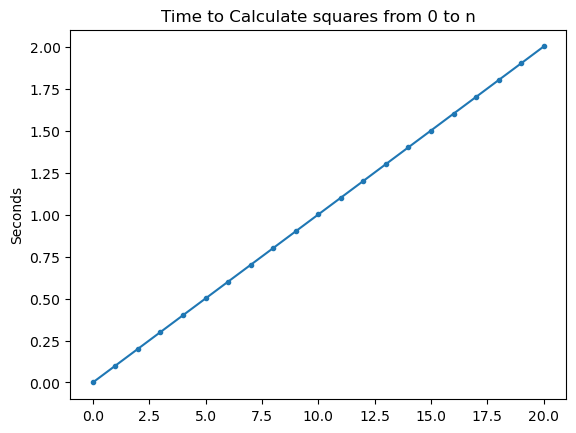

In [8]:
plt.plot(np.array(results)[:, 1], '.-')
plt.xlabel('')
plt.ylabel('Seconds')
plt.title('Time to Calculate squares from 0 to n');

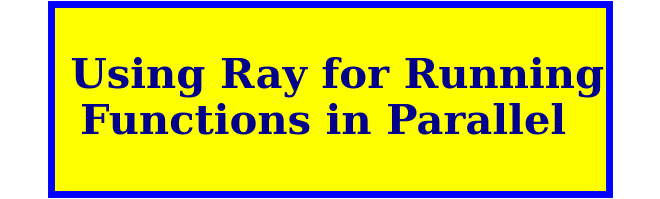

In [9]:
banner.next_topic()

# Using `ray` for running functions in parallel

A nice introduction to using `ray` [is here](https://towardsdatascience.com/10x-faster-parallel-python-without-python-multiprocessing-e5017c93cce1) and also check out [the `ray` documentation](https://docs.ray.io/en/latest/?utm_source=ray_io&utm_medium=website&utm_campaign=nav&_gl=1*8v36pl*_up*MQ..*_ga*MTg2NjAxMDE0Ni4xNzI3Nzk1NDUy*_ga_3RGJ97ZFD7*MTcyNzc5NTQ1MS4xLjAuMTcyNzc5NTQ1MS4wLjAuMA..).

Now run again but run for each set in parallel using ray.

In [ ]:
# !conda install conda-forge::ray-all 
# !conda install psutil 
# !conda install platform

In [10]:
import ray
import time
import psutil
import platform

Following is adapted from [here](https://thepythoncode.com/article/get-hardware-system-information-python#:~:text=CPU%20Information,-Let's%20get%20some&text=psutil's%20cpu_count()%20function,to%20get%20per%20CPU%20frequency.)

In [11]:
print(platform.platform(), '\n')

print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))

print("\nCPU Usage Per Core:")
for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1)):
    print(f"Core {i}: {percentage}%")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")

Linux-4.18.0-553.16.1.el8_10.x86_64-x86_64-with-glibc2.28 

Physical cores: 6
Total cores: 12

CPU Usage Per Core:
Core 0: 0.0%
Core 1: 0.0%
Core 2: 2.0%
Core 3: 0.0%
Core 4: 1.0%
Core 5: 0.0%
Core 6: 0.0%
Core 7: 0.0%
Core 8: 0.0%
Core 9: 0.0%
Core 10: 0.0%
Core 11: 1.0%
Total CPU Usage: 1.3%


In [12]:
ray

<module 'ray' from '/s/parsons/e/fac/anderson/anaconda3/lib/python3.12/site-packages/ray/__init__.py'>

In [13]:
ray.init(ignore_reinit_error=True)

2024-10-22 11:56:01,977	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


RayContext(dashboard_url='127.0.0.1:8265', python_version='3.12.2', ray_version='2.37.0', ray_commit='{{RAY_COMMIT_SHA}}')

In [14]:
ray.shutdown()

In [15]:
ray.init(ignore_reinit_error=True)  # in case we forgot to run ray.shutdown()

delay = 0.05

def f(x):
    time.sleep(delay)
    return x * x

f_for_ray = ray.remote(f)

# More often we just want the ray version, so can write
# 
# @ray.remote
# def f_for_ray(x):
#     time.sleep(delay)
#     return x * x

results = []  # collect n and execution times for ray and without ray

for n in range(21):  # range(0, 60, 4):
    
    start = time.time()
    result = [f(i) for i in range(n)]
    elapsed = time.time() - start

    # for n == 2, argument to ray.get looks like
    #   [ObjectRef(cf9aed5eec5a308bffffffffffffffffffffffff0100000001000000),
    #    ObjectRef(4f4ef6205ce35f90ffffffffffffffffffffffff0100000001000000)]
    
    start = time.time()
    result = ray.get([f_for_ray.remote(i) for i in range(n)])
    elapsed_ray = time.time() - start
    
    
    results.append([n, elapsed_ray, elapsed])   
    print(results[-1])

results = np.array(results)

ray.shutdown()  

2024-10-22 11:59:07,815	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


[0, 2.9087066650390625e-05, 6.4373016357421875e-06]
[1, 0.36646223068237305, 0.05008745193481445]
[2, 0.2381443977355957, 0.10012102127075195]
[3, 0.2278614044189453, 0.15034866333007812]
[4, 0.23063874244689941, 0.20028352737426758]
[5, 0.23311233520507812, 0.2508077621459961]
[6, 0.22829270362854004, 0.3010215759277344]
[7, 0.23595619201660156, 0.35084056854248047]
[8, 0.24004673957824707, 0.40079760551452637]
[9, 0.23122501373291016, 0.45086050033569336]
[10, 0.2337043285369873, 0.5010960102081299]
[11, 0.2319040298461914, 0.5511608123779297]
[12, 0.24521851539611816, 0.601470947265625]
[13, 0.10524153709411621, 0.6512904167175293]
[14, 0.10605645179748535, 0.7016851902008057]
[15, 0.10751509666442871, 0.7513647079467773]
[16, 0.11107349395751953, 0.8016865253448486]
[17, 0.10880279541015625, 0.8517584800720215]
[18, 0.1104421615600586, 0.902174711227417]
[19, 0.11149263381958008, 0.9522149562835693]
[20, 0.1123969554901123, 1.0019772052764893]


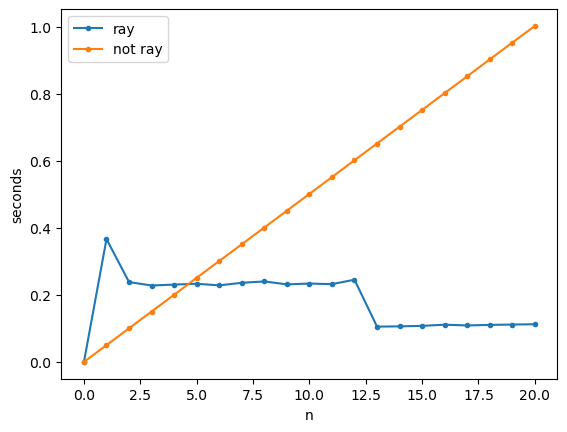

In [16]:
plt.plot(np.array(results)[:, 1:3], '.-')
plt.legend(('ray', 'not ray'))
plt.xlabel('n')
plt.ylabel('seconds');

In [17]:
ray.init(ignore_reinit_error=True)  # in case we forgot to run ray.shutdown()

results = []  # collect n and execution times for ray and without ray

for n in range(0, 60, 4):    ###################### Only change
    
    start = time.time()
    result = [f(i) for i in range(n)]
    elapsed = time.time() - start

    start = time.time()
    result = ray.get([f_for_ray.remote(i) for i in range(n)])
    elapsed_ray = time.time() - start
    
    results.append([n, elapsed_ray, elapsed])   
    print(results[-1])

results = np.array(results)

ray.shutdown()  

2024-10-22 12:00:51,957	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


[0, 2.384185791015625e-05, 3.0994415283203125e-06]
[4, 0.6857001781463623, 0.20035934448242188]
[8, 0.49886488914489746, 0.40077686309814453]
[12, 0.5166325569152832, 0.6013176441192627]
[16, 0.11139082908630371, 0.8017966747283936]
[20, 0.11346817016601562, 1.0021233558654785]
[24, 0.11297273635864258, 1.2022278308868408]
[28, 0.1602327823638916, 1.402726411819458]
[32, 0.1660773754119873, 1.6033296585083008]
[36, 0.16784071922302246, 1.8036348819732666]
[40, 0.21215391159057617, 2.004462480545044]
[44, 0.22168827056884766, 2.204629898071289]
[48, 0.2171773910522461, 2.4046294689178467]
[52, 0.2635610103607178, 2.605504274368286]
[56, 0.27117252349853516, 2.8056986331939697]


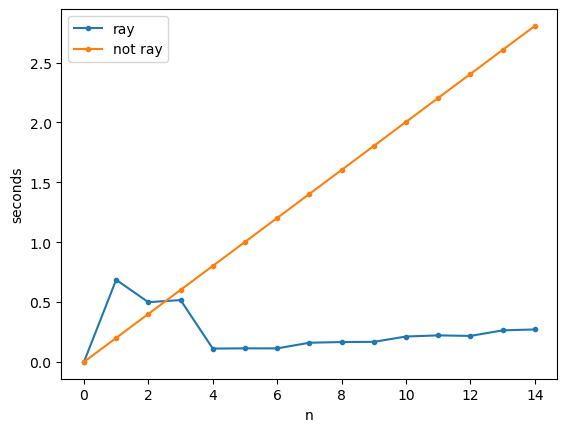

In [18]:
plt.plot(np.array(results)[:, 1:3], '.-')
plt.legend(('ray', 'not ray'))
plt.xlabel('n')
plt.ylabel('seconds');

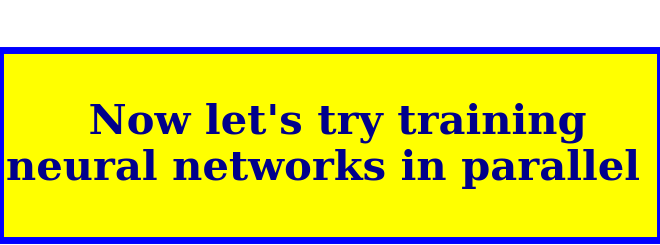

In [19]:
banner.next_topic()

IndexError: list index out of range

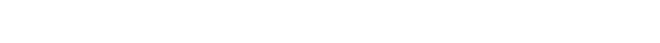

In [20]:
banner.next_topic()

# Now let's try training neural networks in parallel !

In [21]:
import neuralnetworksA4 as nn
import numpy as np
import matplotlib.pyplot as plt

import ray
import psutil
import time

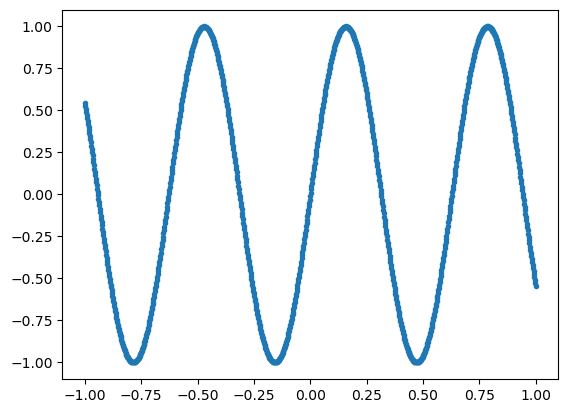

In [22]:
X = np.linspace(-1., 1., 1000).reshape(-1, 1)
T = np.sin(X * 10)
plt.plot(X, T, '.');

In [23]:
hiddens = [ [], [20], [20, 20, 20] ]  # three different networks
learning_rates = [0.001, 0.01, 0.02, 0.05]  # just for sgd
opt_methods = ['sgd', 'adamw']
n_epochs_list = [1000]
batch_size_list = [-1, 10]

print(f'{hiddens=}')
print(f'{learning_rates=}')
print(f'{opt_methods=}')
print(f'{n_epochs_list=}')
print(f'{batch_size_list=}')


hiddens=[[], [20], [20, 20, 20]]
learning_rates=[0.001, 0.01, 0.02, 0.05]
opt_methods=['sgd', 'adamw']
n_epochs_list=[1000]
batch_size_list=[-1, 10]


In [24]:
def train_and_use(hiddens, X, T, n_epochs, batch_size, method, learning_rate):
    nnet = nn.NeuralNetwork(1, hiddens, 1)
    nnet.train(X, T, X, T, n_epochs=n_epochs, batch_size=-1, method=method, learning_rate=lr, verbose=False)
    Y = nnet.use(X)
    rmse = np.sqrt(np.mean((Y - T) ** 2))
    return rmse

In [25]:
start_time = time.time()

parms = []
results = []
for nh in hiddens:
    for method in opt_methods:
        for lr in learning_rates if method != 'scg' else [0.0]:
            for n_epochs in n_epochs_list:
                for batch_size in batch_size_list:
                    parms.append([nh, method, lr, n_epochs, batch_size])
                    
                    results.append(train_and_use(nh, X, T, n_epochs, batch_size, method, lr))

elapsed_without_ray = time.time() - start_time
print(f'Took {elapsed_without_ray:.1f} seconds.')

for p, rmse in zip(parms, results):
    print(f'{rmse:.4f}, {p}')

Took 73.1 seconds.
0.6774, [[], 'sgd', 0.001, 1000, -1]
0.6774, [[], 'sgd', 0.001, 1000, 10]
0.6774, [[], 'sgd', 0.01, 1000, -1]
0.6774, [[], 'sgd', 0.01, 1000, 10]
0.6774, [[], 'sgd', 0.02, 1000, -1]
0.6774, [[], 'sgd', 0.02, 1000, 10]
0.6774, [[], 'sgd', 0.05, 1000, -1]
0.6774, [[], 'sgd', 0.05, 1000, 10]
0.6774, [[], 'adamw', 0.001, 1000, -1]
0.6774, [[], 'adamw', 0.001, 1000, 10]
0.6774, [[], 'adamw', 0.01, 1000, -1]
0.6774, [[], 'adamw', 0.01, 1000, 10]
0.6774, [[], 'adamw', 0.02, 1000, -1]
0.6774, [[], 'adamw', 0.02, 1000, 10]
0.6774, [[], 'adamw', 0.05, 1000, -1]
0.6774, [[], 'adamw', 0.05, 1000, 10]
0.6780, [[20], 'sgd', 0.001, 1000, -1]
0.6778, [[20], 'sgd', 0.001, 1000, 10]
0.6675, [[20], 'sgd', 0.01, 1000, -1]
0.6677, [[20], 'sgd', 0.01, 1000, 10]
0.6556, [[20], 'sgd', 0.02, 1000, -1]
0.6649, [[20], 'sgd', 0.02, 1000, 10]
0.6657, [[20], 'sgd', 0.05, 1000, -1]
0.6665, [[20], 'sgd', 0.05, 1000, 10]
0.6547, [[20], 'adamw', 0.001, 1000, -1]
0.6562, [[20], 'adamw', 0.001, 1000, 1

In [26]:
train_and_use_for_ray = ray.remote(train_and_use)

Or, if only planning to use the function for ray, we could define the function as:
```
@ray.remote
def train_and_use_for_ray(hiddens, X, T, n_epochs, batch_size, method, learning_rate):
    nnet = nn.NeuralNetwork(1, hiddens, 1)
    nnet.train(X, T, X, T, n_epochs=n_epochs, batch_size=-1, method=method, learning_rate=lr, verbose=False)
    Y = nnet.use(X)
    rmse = np.sqrt(np.mean((Y - T) ** 2))
    return rmse
```

In [29]:
ray.shutdown()

In [30]:
ray.init(ignore_reinit_error=True)
print(f'Running with {psutil.cpu_count(logical=False)} cpus.')

start_time = time.time()

parms = []
result_ids = []
for nh in hiddens:
    for method in opt_methods:
        for lr in learning_rates if method != 'scg' else [0.0]:
            for n_epochs in n_epochs_list:
                for batch_size in batch_size_list:
                    parms.append([nh, method, lr, n_epochs, batch_size])

                    result_ids.append(train_and_use_for_ray.remote(nh, X, T, n_epochs, batch_size, method, lr))

results = ray.get(result_ids)

elapsed_with_ray = time.time() - start_time
print(f'Took {elapsed_with_ray:.1f} seconds.')

for p, rmse in zip(parms, results):
    print(f'{rmse:.4f}, {p}')

ray.shutdown()

2024-10-22 12:07:47,669	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Running with 6 cpus.
Took 66.1 seconds.
0.6774, [[], 'sgd', 0.001, 1000, -1]
0.6774, [[], 'sgd', 0.001, 1000, 10]
0.6774, [[], 'sgd', 0.01, 1000, -1]
0.6774, [[], 'sgd', 0.01, 1000, 10]
0.6774, [[], 'sgd', 0.02, 1000, -1]
0.6774, [[], 'sgd', 0.02, 1000, 10]
0.6774, [[], 'sgd', 0.05, 1000, -1]
0.6774, [[], 'sgd', 0.05, 1000, 10]
0.6774, [[], 'adamw', 0.001, 1000, -1]
0.6774, [[], 'adamw', 0.001, 1000, 10]
0.6774, [[], 'adamw', 0.01, 1000, -1]
0.6774, [[], 'adamw', 0.01, 1000, 10]
0.6774, [[], 'adamw', 0.02, 1000, -1]
0.6774, [[], 'adamw', 0.02, 1000, 10]
0.6774, [[], 'adamw', 0.05, 1000, -1]
0.6774, [[], 'adamw', 0.05, 1000, 10]
0.6780, [[20], 'sgd', 0.001, 1000, -1]
0.6777, [[20], 'sgd', 0.001, 1000, 10]
0.6779, [[20], 'sgd', 0.01, 1000, -1]
0.6777, [[20], 'sgd', 0.01, 1000, 10]
0.6776, [[20], 'sgd', 0.02, 1000, -1]
0.6780, [[20], 'sgd', 0.02, 1000, 10]
0.6777, [[20], 'sgd', 0.05, 1000, -1]
0.6781, [[20], 'sgd', 0.05, 1000, 10]
0.6566, [[20], 'adamw', 0.001, 1000, -1]
0.6502, [[20], 'a

In [31]:
print(f'With ray, execution time was {elapsed_without_ray / elapsed_with_ray:.2f} times faster!')

With ray, execution time was 1.11 times faster!


# Ray Clusters

An introduction to defining and using a ray cluster of networked workstations is [summarized here](https://docs.ray.io/en/latest/cluster/vms/user-guides/launching-clusters/on-premises.html).